<a href="https://colab.research.google.com/github/danisimoneaux/GamedayAnalytics/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import numpy as np

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/retail_dataset.csv', encoding='Latin1')

print (df)

Mounted at /content/gdrive
      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

                 state_province  pos

In [ ]:
#Which attributes have empty/null values?
print(df.isnull().sum())

customer_id           0
customer_name         0
address_line_1      121
city                 53
state_province        0
postal_code         153
order_id              0
order_date          257
customer_id.1         0
order_id.1            0
product_id            0
quantity             56
product_id.1          0
product_name          0
product_price         0
total_amount         56
order_year_month    257
order_month         257
dtype: int64


In [ ]:
# Fix the issues with the customer state_province
df['state_province'] = df['state_province'].str.strip()

In [ ]:
#Are there any nulls that can be corrected?
mean_postal_code = df['postal_code'].mean()
df['postal_code'].fillna(mean_postal_code, inplace=True)

In [ ]:
#How many customers have complete addresses?
complete_addresses = df[df['address_line_1'].notnull() & df['city'].notnull() & df['state_province'].notnull() & df['postal_code'].notnull()]
print(f"There are {len(complete_addresses)} customers with complete addresses out of {len(df)} total customers.")

There are 9395 customers with complete addresses out of 9569 total customers.


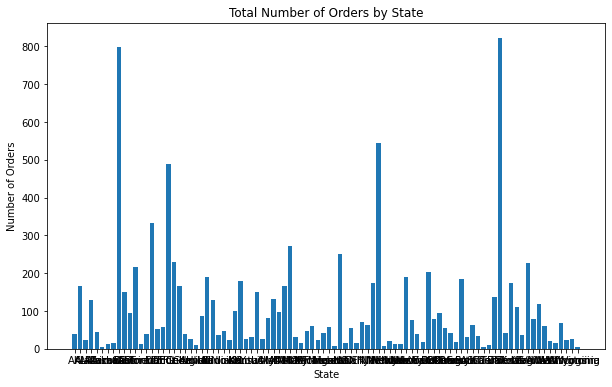

In [ ]:
#Plot the total number of orders and revenue by state.
# Calculate total revenue by state_province
state_stats = df.groupby('state_province').agg({'order_id': 'count', 'total_amount': 'sum'})

# Create a bar chart of the total number of orders by state
plt.figure(figsize=(10, 6))
plt.bar(state_stats.index, state_stats['order_id'])
plt.title('Total Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()